In [9]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
twitter_data = pd.read_csv("./election_day_tweets.csv")
index = range(1,102240)

In [2]:
twitter_data.head()

,text,created_at,geo,lang,place,coordinates,user.favourites_count,user.statuses_count,user.description,user.location,...,user.geo_enabled,user.profile_background_color,user.profile_image_url,user.time_zone,id,favorite_count,retweeted,source,favorited,retweet_count
0,.@Lawrence @HillaryClinton Two first @SenSchu...,8/11/16 4:04,NaN,en,NaN,NaN,18882,26939,"The Specialist, Copyrighted TX0008044160 #Surv...",WorldWide 80Million StealthRUs,...,True,131516,http://pbs.twimg.com/profile_images/7878871945...,America/Los_Angeles,7.958390e+17,11,False,Twitter for Android,False,8
1,My @latimesopinion op-ed on historic #Californ...,8/11/16 4:08,NaN,en,NaN,NaN,8,4841,Hoover Institution research fellow; https://t....,"Palo Alto, California",...,True,C0DEED,http://pbs.twimg.com/profile_images/6514470051...,Pacific Time (US & Canada),7.958400e+17,3,False,Twitter Web Client,False,4
2,#Senate Wisconsin Senate Preview: Johnson vs. ...,8/11/16 4:11,NaN,en,NaN,NaN,728,160390,US SENATE NEWS FEED. The U.S. Senate is the w...,USA,...,False,473969,http://pbs.twimg.com/profile_images/6155877017...,Alaska,7.958410e+17,0,False,dlvr.it,False,0
3,If Rubio Wins and #Trump Loses in #Florida... ...,8/11/16 4:12,NaN,en,NaN,NaN,0,18105,The most trending Marco Rubio news as collecte...,Washington DC,...,False,C0DEED,http://pbs.twimg.com/profile_images/5890065307...,NaN,7.958410e+17,0,False,Lead Stories Feed Publisher,False,0
4,#Senate Wisconsin Senate Preview: Johnson vs. ...,8/11/16 4:16,NaN,en,NaN,NaN,4722,247322,News & #ALERTS. We are a large group of proud ...,24hr Live HD Stream Broadcast,...,False,1B95E0,http://pbs.twimg.com/profile_images/7971276617...,Eastern Time (US & Canada),7.958420e+17,0,False,IFTTT,False,0


Text(0.5, 1.0, 'user verification vs frequency')

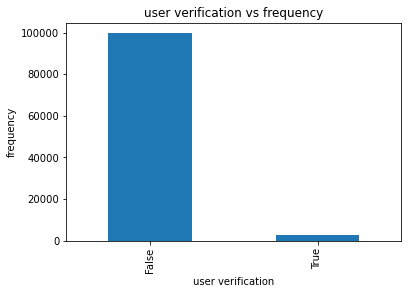

In [102]:
figure = twitter_data['user.verified'].value_counts().sort_index().plot.bar(x = "varification", y = "frequency")
figure.set_xlabel("user verification")
figure.set_ylabel("frequency")
figure.set_title("user verification vs frequency")

(-1.1087433330133927,
 1.1049136247291516,
 -1.1073518888952372,
 1.106305068847307)

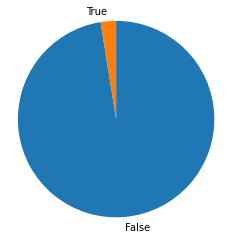

In [21]:
# code for the pie chart seen above
sorted_counts = twitter_data['user.verified'].value_counts()
fig = plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False)
plt.axis('square')


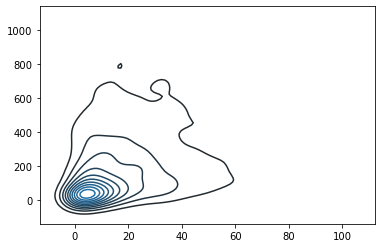

In [46]:
sns.kdeplot(twitter_data[(twitter_data['user.followers_count'] < 100) & (twitter_data['user.statuses_count'] < 1000)].loc[:, ['user.followers_count', 'user.statuses_count']].dropna().sample(11000))

<Figure size 14400x7200 with 0 Axes>

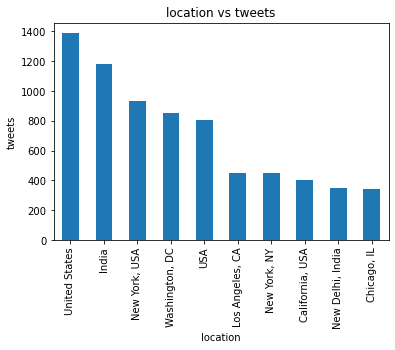

<Figure size 14400x7200 with 0 Axes>

In [26]:
figure = twitter_data['user.location'].value_counts().head(10).plot.bar()
figure.set_xlabel("location")
figure.set_ylabel("tweets")
figure.set_title("location vs tweets")

plt.figure(figsize = (200,100))

Text(0.5, 1.0, 'Time zone vs Tweets')

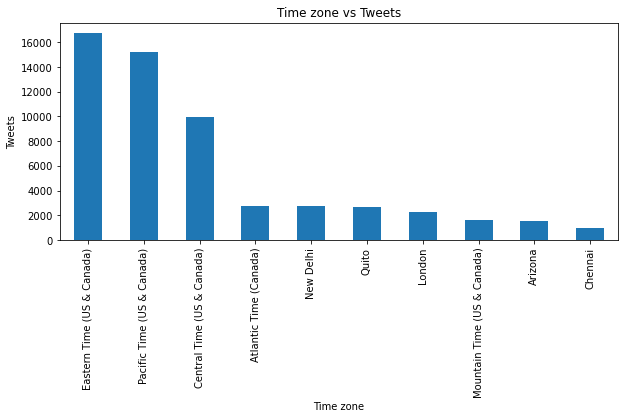

In [29]:
fig = twitter_data['user.time_zone'].value_counts().head(10).plot.bar(figsize = (10, 4))
fig.set_xlabel("Time zone")
fig.set_ylabel("Tweets")
fig.set_title("Time zone vs Tweets")


Text(0.5, 1.0, 'Language vs Tweets')

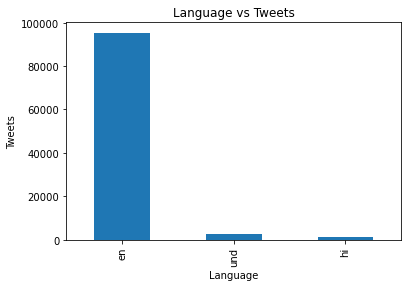

In [32]:
fig = twitter_data['lang'].value_counts().head(3).plot.bar()
fig.set_xlabel("Language")
fig.set_ylabel("Tweets")
fig.set_title("Language vs Tweets")

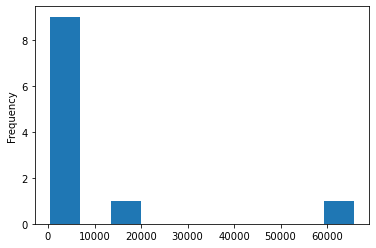

In [35]:
twitter_data['favorite_count'].value_counts().head(11).plot.hist()

Text(0.5, 1.0, 'Num Tweets vs Frequency')

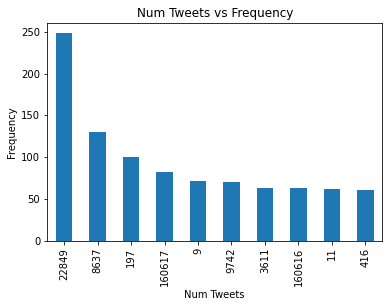

In [40]:
fig = twitter_data['user.statuses_count'].value_counts().head(10).plot.bar()
fig.set_xlabel("Num Tweets")
fig.set_ylabel("Frequency")
fig.set_title("Num Tweets vs Frequency")

Text(0.5, 1.0, 'Num Tweets vs Favourites')

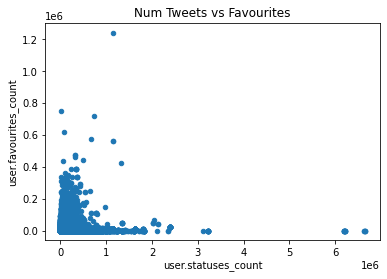

In [43]:
fig = twitter_data.plot.scatter(x = "user.statuses_count", y = "user.favourites_count")
fig.set_title("Num Tweets vs Favourites")

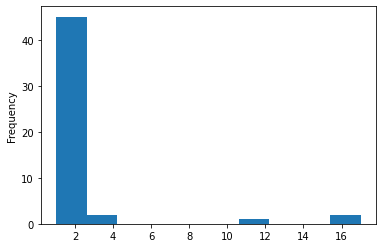

In [26]:
twitter['user.favourites_count'].head(100).value_counts().plot.hist()

In [28]:
twitter_data.size

3476126

In [30]:
twitter_data.columns

Index(['text', 'created_at', 'geo', 'lang', 'place', 'coordinates',
       'user.favourites_count', 'user.statuses_count', 'user.description',
       'user.location', 'user.id', 'user.created_at', 'user.verified',
       'user.following', 'user.url', 'user.listed_count',
       'user.followers_count', 'user.default_profile_image', 'user.utc_offset',
       'user.friends_count', 'user.default_profile', 'user.name', 'user.lang',
       'user.screen_name', 'user.geo_enabled', 'user.profile_background_color',
       'user.profile_image_url', 'user.time_zone', 'id', 'favorite_count',
       'retweeted', 'source', 'favorited', 'retweet_count'],
      dtype='object')

In [32]:
satuses_and_favourites_count = ['user.statuses_count', 'user.favourites_count']
cols_of_interest = twitter_data[satuses_and_favourites_count]
cols_of_interest.describe()

,user.statuses_count,user.favourites_count
count,1.022390e+05,1.022390e+05
mean,4.600986e+04,6.957719e+03
std,1.571082e+05,1.839335e+04
min,1.000000e+00,0.000000e+00
25%,2.385000e+03,1.610000e+02
50%,1.014200e+04,1.407000e+03
75%,3.506350e+04,6.222500e+03
max,6.642303e+06,1.241527e+06


Text(0.5, 1.0, 'retweet_count vs user.satuses_count')

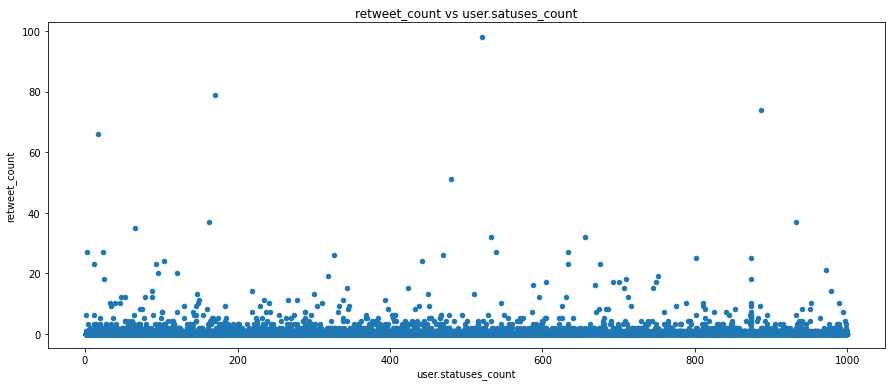

In [46]:
fig = twitter_data[(twitter_data['user.statuses_count'] < 1000) & (twitter_data['retweet_count'] < 100)].plot.scatter(x = "user.statuses_count", y = "retweet_count", figsize = (15, 6))
fig.set_title("retweet_count vs user.satuses_count")

Text(0.5, 1.0, 'retweet_count vs user.satuses_count')

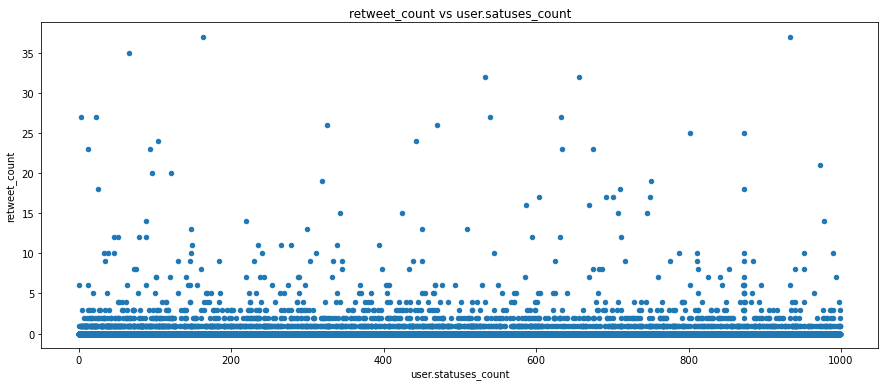

In [49]:
fig = twitter_data[(twitter_data['user.statuses_count'] < 1000) & (twitter_data['retweet_count'] < 50)].plot.scatter(x = "user.statuses_count", y = "retweet_count", figsize = (15, 6))
fig.set_title("retweet_count vs user.satuses_count")

Text(0.5, 1.0, 'Total number of tweets made by a user vs Total number of favourates a user got')

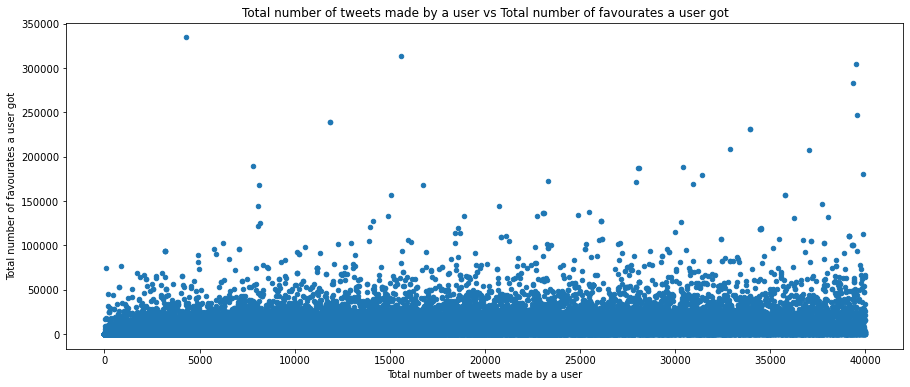

In [82]:
fig = twitter_data[(twitter_data['user.statuses_count'] < 40000) & (twitter_data['user.favourites_count'] < 700000)].plot.scatter(x = "user.statuses_count", y = "user.favourites_count", figsize = (15, 6))
fig.set_xlabel("Total number of tweets made by a user")
fig.set_ylabel("Total number of favourates a user got")
fig.set_title("Total number of tweets made by a user vs Total number of favourates a user got")
# For this one i can say that even though the number of favourite_count is decreasing as seen below it is still consistant and is still getting the favourites. 
# Thus even after haveing less followers, by increasing the number of status in an account a user can get his/her post famous. 

Text(0.5, 1.0, 'Total number of tweets made by a user vs Number of time the tweet got favourited')

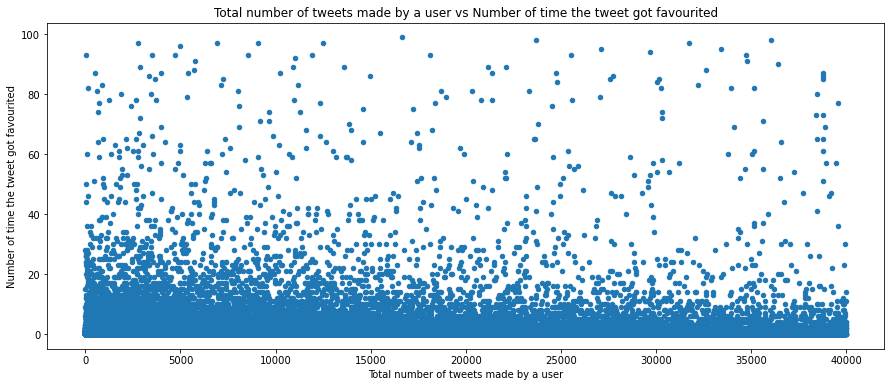

In [29]:
fig = twitter_data[(twitter_data['user.statuses_count'] < 40000) & (twitter_data['favorite_count'] < 100)].plot.scatter(x = "user.statuses_count", y = "favorite_count", figsize = (15, 6))
fig.set_xlabel("Total number of tweets made by a user")
fig.set_ylabel("Number of time the tweet got favourited")
fig.set_title("Total number of tweets made by a user vs Number of time the tweet got favourited")
# For this one i can say that even though the number of favourite_count is decreasing as seen below it is still consistant and is still getting the favourites. 
# Thus even after haveing less followers, by increasing the number of status in an account a user can get his/her post famous. 

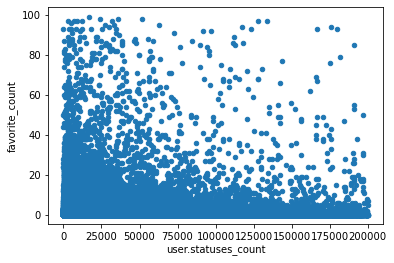

In [136]:
twitter_data[(twitter_data['user.statuses_count'] < 200000) & (twitter_data['favorite_count'] < 100)].plot.scatter(x = "user.statuses_count", y = "favorite_count")

# For this one i can say that even though the number of favourite_count is decreasing as seen below it is still consistant and is still getting the favourites. 
# Thus even after haveing less followers, by increasing the number of status in an account a user can get his/her post famous. 

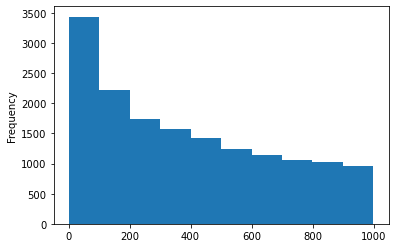

In [36]:
twitter_data[twitter_data['user.statuses_count'] < 1000]['user.statuses_count'].plot.hist()

Text(0.5, 1.0, 'Number of Retweets vs Number of Favourates')

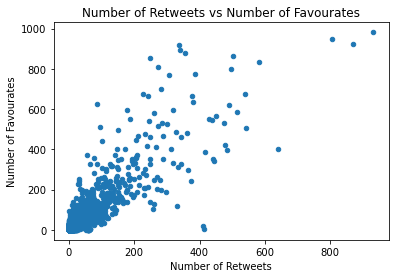

In [83]:
fig = twitter_data[(twitter_data['retweet_count'] < 1000) & (twitter_data['favorite_count'] < 1000)].plot.scatter(x = "retweet_count", y = "favorite_count")
fig.set_xlabel("Number of Retweets")
fig.set_ylabel("Number of Favourates")
fig.set_title("Number of Retweets vs Number of Favourates")

In [117]:
columns_of_interest = ['user.followers_count', 'user.favourites_count', 'user.statuses_count', 'retweet_count', 'favorite_count']
two_columns_of_data = twitter_data[columns_of_interest]
two_columns_of_data.describe()

,user.followers_count,user.favourites_count,user.statuses_count,retweet_count,favorite_count
count,1.022390e+05,1.022390e+05,1.022390e+05,102239.000000,102239.000000
mean,9.378895e+03,6.957719e+03,4.600986e+04,1.715568,3.186367
std,1.975769e+05,1.839335e+04,1.571082e+05,31.022005,70.297145
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000
25%,1.310000e+02,1.610000e+02,2.385000e+03,0.000000,0.000000
50%,4.150000e+02,1.407000e+03,1.014200e+04,0.000000,0.000000
75%,1.241000e+03,6.222500e+03,3.506350e+04,0.000000,1.000000
max,1.661188e+07,1.241527e+06,6.642303e+06,4524.000000,17539.000000


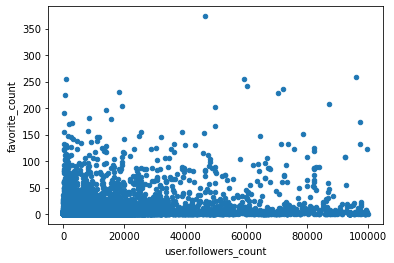

In [88]:
fig = twitter_data[(twitter_data['user.followers_count'] < 100000) & (twitter_data['retweet_count'] < 100)].plot.scatter(x = "user.followers_count", y = "favorite_count")


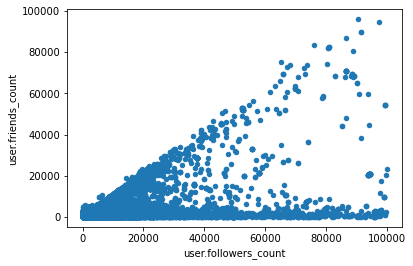

In [39]:
twitter_data[(twitter_data['user.followers_count'] < 100000) & (twitter_data['user.friends_count'] < 100000)].plot.scatter(x = "user.followers_count", y = "user.friends_count")

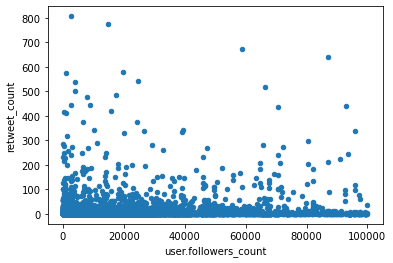

In [40]:
twitter_data[(twitter_data['user.followers_count'] < 100000) & (twitter_data['retweet_count'] < 1000)].plot.scatter(x = "user.followers_count", y = "retweet_count")

Text(0.5, 1.0, 'Number Followers vs Total number of tweets made by the user')

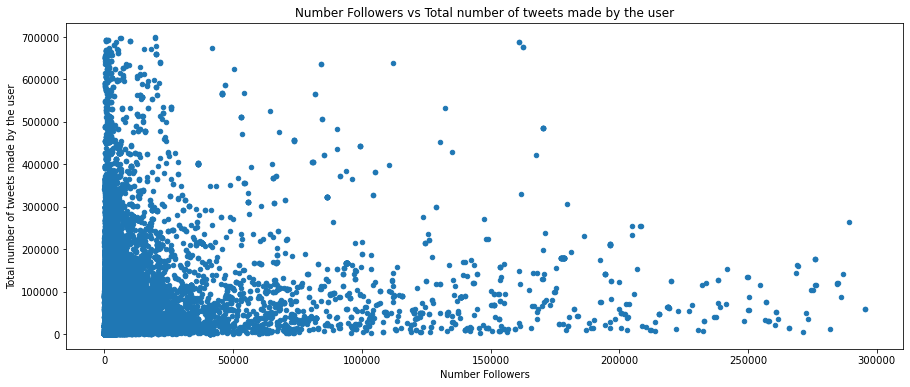

In [62]:
fig = twitter_data[(twitter_data['user.followers_count'] < 300000) & (twitter_data['user.statuses_count'] < 700000)].plot.scatter(x = "user.followers_count", y = "user.statuses_count", figsize = (15, 6))
fig.set_xlabel("Number Followers")
fig.set_ylabel("Total number of tweets made by the user")
fig.set_title("Number Followers vs Total number of tweets made by the user")

Text(0.5, 1.0, 'Number Followings vs Total number of tweets made by the user')

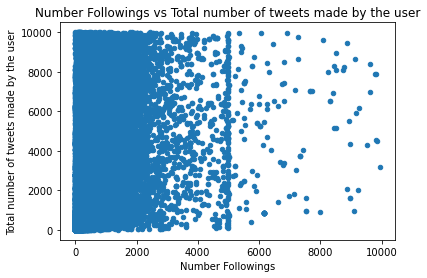

In [90]:
fig = twitter_data[(twitter_data['user.friends_count'] < 10000) & (twitter_data['user.statuses_count'] < 10000)].plot.scatter(x = "user.friends_count", y = "user.statuses_count")
fig.set_xlabel("Number Followings")
fig.set_ylabel("Total number of tweets made by the user")
fig.set_title("Number Followings vs Total number of tweets made by the user")

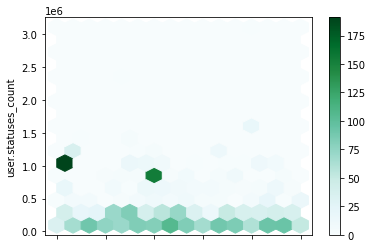

In [43]:
twitter_data[(twitter_data['user.followers_count'] < 1000) & (twitter_data['user.statuses_count'] > 100000)].plot.hexbin(x = "user.followers_count" , y = "user.statuses_count", gridsize = 15)

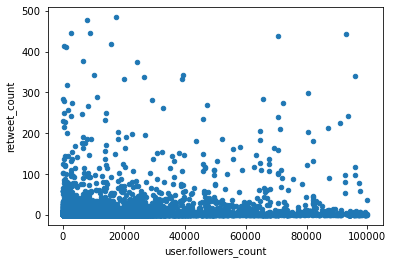

In [53]:
twitter_data[(twitter_data['user.followers_count'] < 100000) & (twitter_data['retweet_count'] < 500)].plot.scatter(x = "user.followers_count", y = "retweet_count")

Text(0.5, 1.0, 'Total number of followers vs Total number of favourites')

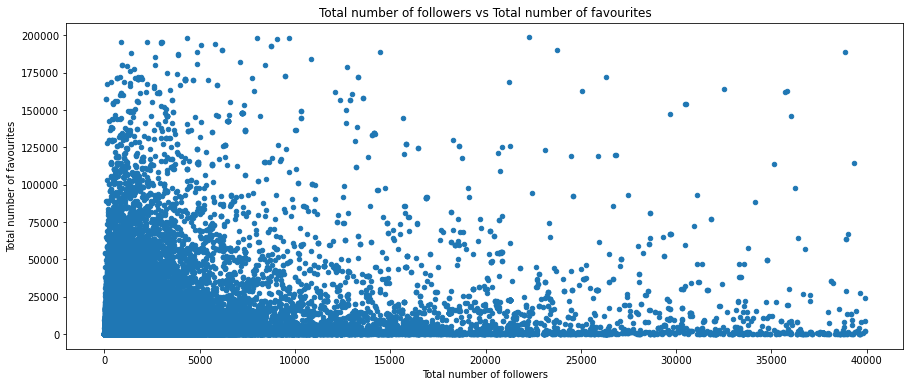

In [28]:
fig = twitter_data[(twitter_data['user.followers_count'] < 40000) & (twitter_data['user.favourites_count'] < 200000)].plot.scatter(x = "user.followers_count", y = "user.favourites_count", figsize = (15, 6))
fig.set_xlabel("Total number of followers")
fig.set_ylabel("Total number of favourites")
fig.set_title("Total number of followers vs Total number of favourites")

Text(0.5, 1.0, 'Number Followers vs Number of Favourites on the tweet')

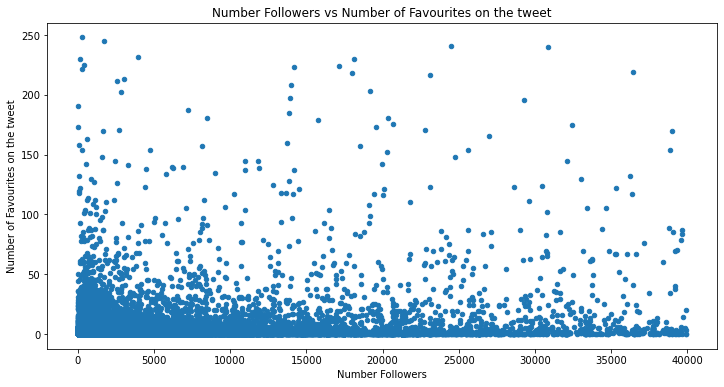

In [92]:
fig = twitter_data[(twitter_data['user.followers_count'] < 40000) & (twitter_data['favorite_count'] < 250)].plot.scatter(x = "user.followers_count", y = "favorite_count",  figsize = (12, 6))
fig.set_xlabel("Number Followers")
fig.set_ylabel("Number of Favourites on the tweet")
fig.set_title("Number Followers vs Number of Favourites on the tweet")

Text(0.5, 1.0, 'Number Followers vs Number of Retweets made on the tweet')

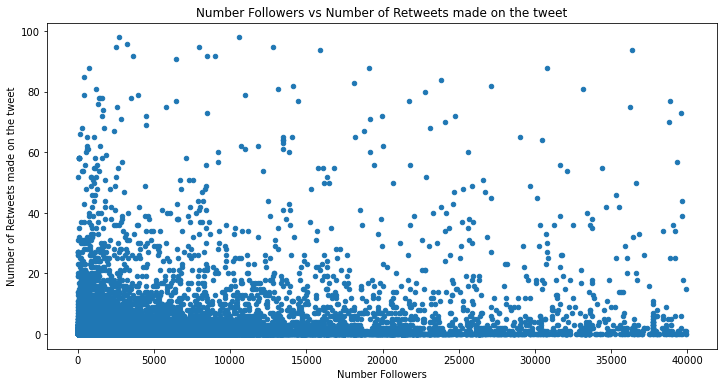

In [22]:
fig = twitter_data[(twitter_data['user.followers_count'] < 40000) & (twitter_data['retweet_count'] < 100)].plot.scatter(x = "user.followers_count", y = "retweet_count",  figsize = (12, 6))
fig.set_xlabel("Number Followers")
fig.set_ylabel("Number of Retweets made on the tweet")
fig.set_title("Number Followers vs Number of Retweets made on the tweet")

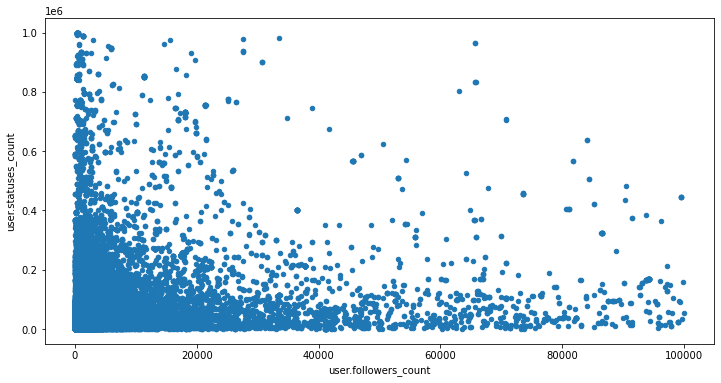

In [85]:
twitter_data[(twitter_data['user.followers_count'] < 100000) & (twitter_data['user.statuses_count'] < 1000000)].plot.scatter(x = "user.followers_count", y = "user.statuses_count",  figsize = (12, 6))

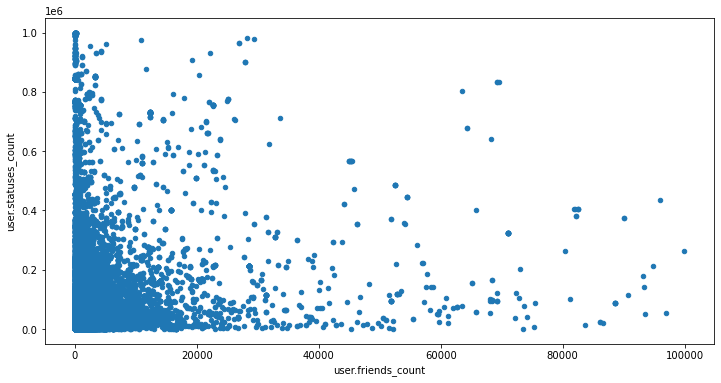

In [7]:
twitter_data[(twitter_data['user.friends_count'] < 100000) & (twitter_data['user.statuses_count'] < 1000000)].plot.scatter(x = "user.friends_count", y = "user.statuses_count",  figsize = (12, 6))

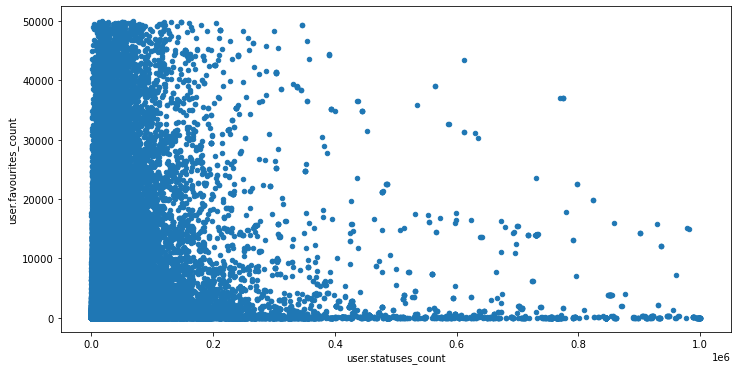

In [107]:
twitter_data[(twitter_data['user.favourites_count'] < 50000) & (twitter_data['user.statuses_count'] < 1000000)].plot.scatter(x = "user.statuses_count", y = "user.favourites_count",  figsize = (12, 6))

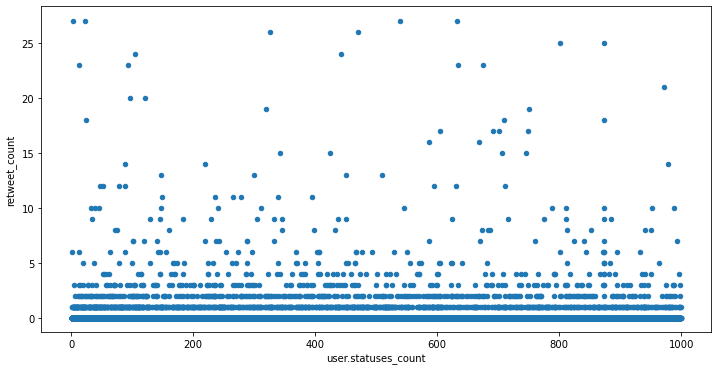

In [106]:
fig = twitter_data[(twitter_data['retweet_count'] < 30) & (twitter_data['user.statuses_count'] < 1000)].plot.scatter(x = "user.statuses_count", y = "retweet_count",  figsize = (12, 6))

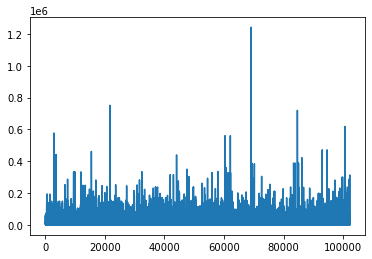

In [60]:
plt.plot(index, twitter_data['user.favourites_count'])


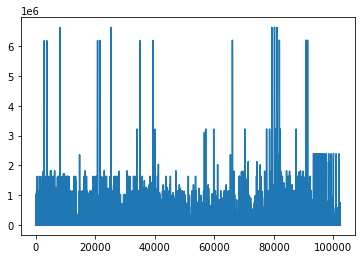

In [57]:
plt.plot(index, twitter_data['user.statuses_count'])

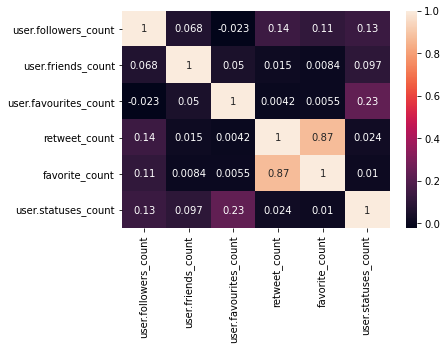

In [182]:
f = (
    twitter_data.loc[:, ['user.followers_count', 'user.friends_count', 'user.favourites_count', 'retweet_count', 'favorite_count', 'user.statuses_count']]
        .applymap(lambda v: int(v) if int(v) else np.nan)
        .dropna()
).corr()

sns.heatmap(f, annot=True)


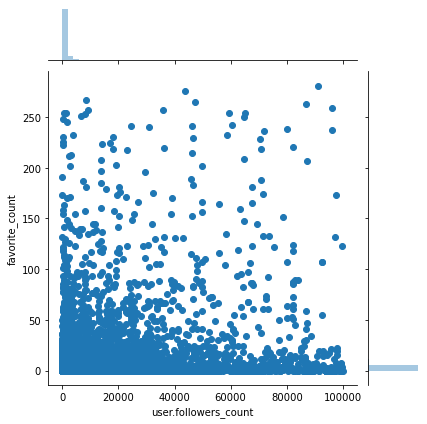

In [21]:
sns.jointplot(x = "user.followers_count", y = "favorite_count", data = (twitter_data[(twitter_data['user.followers_count'] < 100000) & (twitter_data['favorite_count'] < 300)])) 

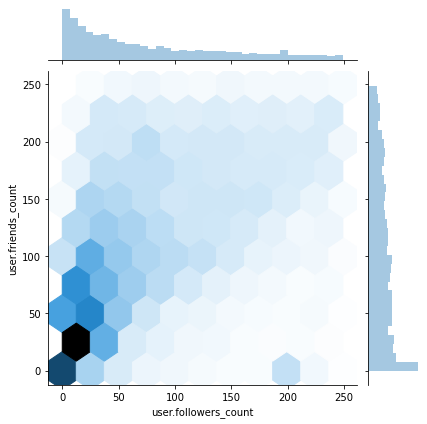

In [36]:
sns.jointplot(x = "user.followers_count", y = "user.friends_count", data = (twitter_data[(twitter_data['user.followers_count'] < 250) & (twitter_data['user.friends_count'] < 250)]), kind = "hex", gridsize = 10) 

Text(0.5, 1.0, 'Words count vs Number of Tweets')

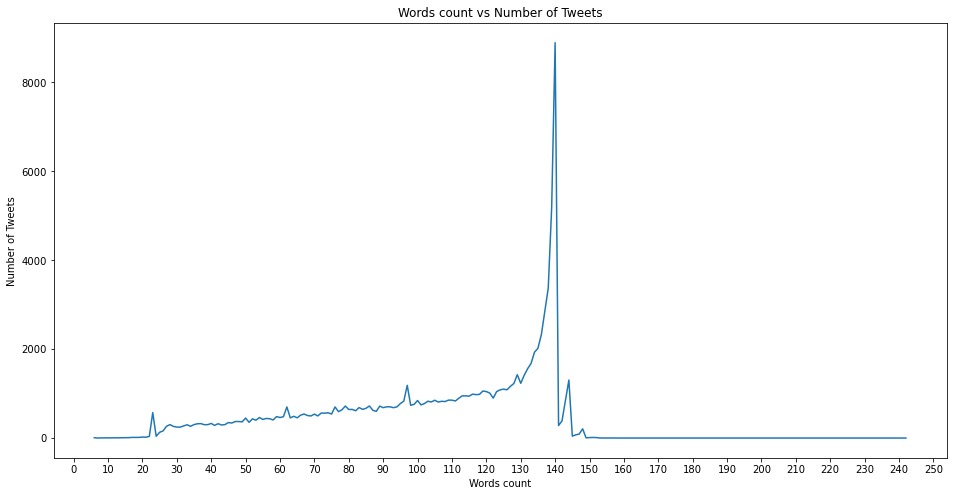

In [4]:
twitter_data["text_len"] = twitter_data["text"].apply(lambda x: len(x))
fig = twitter_data['text_len'].value_counts().sort_index().plot.line(figsize=(16,8))
fig.xaxis.set_major_locator(ticker.MultipleLocator(10))
fig.set_xlabel("Words count")
fig.set_ylabel("Number of Tweets")
fig.set_title("Words count vs Number of Tweets")
# 139 is the peak of the graph

In [ ]:
sns.jointplot(x = "user.followers_count", y = "favorite_count", data = (twitter_data[(twitter_data['user.followers_count'] < 100000) & (twitter_data['favorite_count'] < 300)])) 

In [3]:
# It stats from here
# Turning all the text to lower case
for x in range(102238):
 twitter_data['text'].iloc[x] = twitter_data['text'].iloc[x].lower()

# Spliting every single word in all of the tweets
txt = twitter_data['text'].str.split()

# Creating a directory to save a particular word with its reoccurance count
d = {}

for x in range(102238):
    for word in txt[x]: 
        d[word] = d.get(word, 0) + 1
        
txt_freq = []
for key, value in d.items():
    txt_freq.append((value, key))

# Arrangeing in descending order
txt_freq.sort(reverse=True)

/Users/arshpolra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [4]:
top_tweets = txt_freq[0:11]
print(top_tweets)

[(56433, 'congress'), (51943, 'the'), (37439, 'to'), (27308, 'and'), (26929, 'a'), (24065, 'of'), (22530, 'in'), (20884, 'is'), (17892, 'for'), (11659, 'will'), (11535, 'i')]


In [49]:
# run line 127 before using this
# This code finds the number of time a word is repeated 
# The most used words (more than 4 characters count) were taken from the above and then searched on this code to find 
# their total reoccurance as some words has ". , and othe symbols" 

count_word = 0

for x in range(102238):
    count_word = count_word + (twitter_data.iloc[x][0].count("#electionday"))
    #print(x)
    
print(count_word)



1208
